## Analyzing impact of Fed Chair discussion

In [14]:
#requirements
# !pip install git+https://github.com/openai/whisper.git -q
# !pip install pytube -q
#!nvidia-smi -L
#https://www.youtube.com/watch?v=Q8FmkU6-fAM, Dec fed meeting next analysis
import whisper
from pytube import YouTube
import numpy as np
import pandas as pd
import datetime
import pandas as pd


In [3]:
#sets up video to be used for transcript using the pytube package
youtube_video_url = "https://www.youtube.com/watch?v=NT2H9iyd-ms"
fed_video = YouTube(youtube_video_url)

In [4]:
fed_video.title

'WATCH LIVE | Fed Chair Powell Discusses Latest Fed Rate Hike'

In [5]:
fed_video.streams

[<Stream: itag="17" mime_type="video/3gpp" res="144p" fps="7fps" vcodec="mp4v.20.3" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="137" mime_type="video/mp4" res="1080p" fps="30fps" vcodec="avc1.640028" progressive="False" type="video">, <Stream: itag="248" mime_type="video/webm" res="1080p" fps="30fps" vcodec="vp9" progressive="False" type="video">, <Stream: itag="136" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001f" progressive="False" type="video">, <Stream: itag="247" mime_type="video/webm" res="720p" fps="30fps" vcodec="vp9" progressive="False" type="video">, <Stream: itag="135" mime_type="video/mp4" res="480p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="vid

In [6]:
#list of streams of varying resolution and types, only interested in audio for transcript
for stream in fed_video.streams:
  print(stream)

<Stream: itag="17" mime_type="video/3gpp" res="144p" fps="7fps" vcodec="mp4v.20.3" acodec="mp4a.40.2" progressive="True" type="video">
<Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">
<Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">
<Stream: itag="137" mime_type="video/mp4" res="1080p" fps="30fps" vcodec="avc1.640028" progressive="False" type="video">
<Stream: itag="248" mime_type="video/webm" res="1080p" fps="30fps" vcodec="vp9" progressive="False" type="video">
<Stream: itag="136" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001f" progressive="False" type="video">
<Stream: itag="247" mime_type="video/webm" res="720p" fps="30fps" vcodec="vp9" progressive="False" type="video">
<Stream: itag="135" mime_type="video/mp4" res="480p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="video">
<St

In [7]:
streams = fed_video.streams.filter(only_audio=True)
streams

[<Stream: itag="139" mime_type="audio/mp4" abr="48kbps" acodec="mp4a.40.5" progressive="False" type="audio">, <Stream: itag="140" mime_type="audio/mp4" abr="128kbps" acodec="mp4a.40.2" progressive="False" type="audio">, <Stream: itag="249" mime_type="audio/webm" abr="50kbps" acodec="opus" progressive="False" type="audio">, <Stream: itag="250" mime_type="audio/webm" abr="70kbps" acodec="opus" progressive="False" type="audio">, <Stream: itag="251" mime_type="audio/webm" abr="160kbps" acodec="opus" progressive="False" type="audio">]

In [8]:
#selects the first available audio stream and downloads it, can train on higher quality with bigger whisper models
stream = streams.first()
stream.download(filename='fed_meeting.mp4')

'c:\\Users\\ahmed\\OneDrive\\Desktop\\ML-for-Finance-Quant\\fed_meeting.mp4'

In [9]:
#import ffmpegx
#trim out sections where Powell is not speaking during the meeting
#start the audio file at 375 seconds, continue for 2715 seconds, and slice remaining audio
#download ffmpeg from https://www.gyan.dev/ffmpeg/builds/, setup /bin folder in path under environment variables in system
#!ffmpeg -ss 378 -i fed_meeting.mp4 -t 2715 fed_meeting_trimmed.mp4

In [10]:
# do the transcription, takes around 7 mins
#sets up a whisper model to analyze audio
model = whisper.load_model('base')
transcribed_text = model.transcribe("fed_meeting_trimmed.mp4")
transcribed_text

c:\Users\ahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\whisper\transcribe.py:78: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


{'text': " Good afternoon. My colleagues and I are strongly committed to bringing inflation back down to our 2% goal. We have both the tools that we need and the resolve it will take to restore price stability on behalf of American families and businesses. Price stability is the responsibility of the Federal Reserve and serves as the bedrock of our economy. Without price stability, the economy does not work for anyone. In particular, without price stability, we will not achieve a sustained period of strong labor market conditions that benefit all. Today, the FOMC raised our policy interest rate by 75 basis points and we continue to anticipate that ongoing increases will be appropriate. We are moving our policy stance purposefully to a level that will be sufficiently restrictive to return inflation to 2%. In addition, we are continuing the process of significantly reducing the size of our balance sheet. Restoring price stability will likely require maintaining a restrictive stance of po

In [11]:
#index into dict to grab entire string
transcribed_text["text"]

" Good afternoon. My colleagues and I are strongly committed to bringing inflation back down to our 2% goal. We have both the tools that we need and the resolve it will take to restore price stability on behalf of American families and businesses. Price stability is the responsibility of the Federal Reserve and serves as the bedrock of our economy. Without price stability, the economy does not work for anyone. In particular, without price stability, we will not achieve a sustained period of strong labor market conditions that benefit all. Today, the FOMC raised our policy interest rate by 75 basis points and we continue to anticipate that ongoing increases will be appropriate. We are moving our policy stance purposefully to a level that will be sufficiently restrictive to return inflation to 2%. In addition, we are continuing the process of significantly reducing the size of our balance sheet. Restoring price stability will likely require maintaining a restrictive stance of policy for 

In [12]:
#breaks out the speech into segments
for clips in transcribed_text['segments']:
  print(clips)
  second = int(clips['start'])
  second = second - (second % 5)
  print(second)

{'id': 0, 'seek': 0, 'start': 0.0, 'end': 8.0, 'text': ' Good afternoon. My colleagues and I are strongly committed to bringing inflation back down to our 2% goal.', 'tokens': [2205, 6499, 13, 1222, 7734, 293, 286, 366, 10613, 7784, 281, 5062, 15860, 646, 760, 281, 527, 568, 4, 3387, 13], 'temperature': 0.0, 'avg_logprob': -0.14572519869417758, 'compression_ratio': 1.5818181818181818, 'no_speech_prob': 0.061538614332675934}
0
{'id': 1, 'seek': 0, 'start': 8.0, 'end': 16.0, 'text': ' We have both the tools that we need and the resolve it will take to restore price stability on behalf of American families and businesses.', 'tokens': [492, 362, 1293, 264, 3873, 300, 321, 643, 293, 264, 14151, 309, 486, 747, 281, 15227, 3218, 11826, 322, 9490, 295, 2665, 4466, 293, 6011, 13], 'temperature': 0.0, 'avg_logprob': -0.14572519869417758, 'compression_ratio': 1.5818181818181818, 'no_speech_prob': 0.061538614332675934}
5
{'id': 2, 'seek': 0, 'start': 16.0, 'end': 22.0, 'text': ' Price stability is

In [15]:
#SPDR S&P 500 ETF Trust, (SPY)
stock_data = pd.read_csv("stock_data.csv")
stock_data

,date,open,high,low,close,volume,average,barCount
0,2022-11-02 14:31:15,387.13,387.17,386.75,386.83,82173.0,386.884,444
1,2022-11-02 14:31:20,386.80,387.00,386.80,386.91,38918.0,386.913,234
2,2022-11-02 14:31:25,386.94,386.96,386.55,386.64,48165.0,386.749,232
3,2022-11-02 14:31:30,386.64,386.95,386.59,386.86,30688.0,386.760,190
4,2022-11-02 14:31:35,386.91,386.92,386.81,386.87,22270.0,386.862,130
...,...,...,...,...,...,...,...,...
538,2022-11-02 15:16:05,380.30,380.48,380.30,380.39,40401.0,380.418,265
539,2022-11-02 15:16:10,380.37,380.49,380.24,380.45,40709.0,380.378,221
540,2022-11-02 15:16:15,380.45,380.48,380.38,380.39,12465.0,380.425,69
541,2022-11-02 15:16:20,380.38,380.38,380.28,380.36,24107.0,380.324,139


In [16]:
# adding new column with text spoken during each 5 seconds
# matching segments of the speech from transcribed_text and their start and end times in seconds,

for segment in transcribed_text['segments']:
   second = int(segment['start'])
   second = second - (second % 5)
   stock_data.loc[second / 5, 'text'] = segment['text']

stock_data



,date,open,high,low,close,volume,average,barCount,text
0,2022-11-02 14:31:15,387.13,387.17,386.75,386.83,82173.0,386.884,444,Good afternoon. My colleagues and I are stron...
1,2022-11-02 14:31:20,386.80,387.00,386.80,386.91,38918.0,386.913,234,We have both the tools that we need and the r...
2,2022-11-02 14:31:25,386.94,386.96,386.55,386.64,48165.0,386.749,232,NaN
3,2022-11-02 14:31:30,386.64,386.95,386.59,386.86,30688.0,386.760,190,Price stability is the responsibility of the ...
4,2022-11-02 14:31:35,386.91,386.92,386.81,386.87,22270.0,386.862,130,"Without price stability, the economy does not..."
...,...,...,...,...,...,...,...,...,...
538,2022-11-02 15:16:05,380.30,380.48,380.30,380.39,40401.0,380.418,265,At the same time now you see services inflati...
539,2022-11-02 15:16:10,380.37,380.49,380.24,380.45,40709.0,380.378,221,think that the inflation picture has become m...
540,2022-11-02 15:16:15,380.45,380.48,380.38,380.39,12465.0,380.425,69,this year without question.
541,2022-11-02 15:16:20,380.38,380.38,380.28,380.36,24107.0,380.324,139,That means that we have to have policy be mor...


In [17]:
#creates new column that stores percent the price moved during each 5 second interval
stock_data['percent'] = ((stock_data['close'] - stock_data['open']) / stock_data['open']) * 100
stock_data

,date,open,high,low,close,volume,average,barCount,text,percent
0,2022-11-02 14:31:15,387.13,387.17,386.75,386.83,82173.0,386.884,444,Good afternoon. My colleagues and I are stron...,-0.077493
1,2022-11-02 14:31:20,386.80,387.00,386.80,386.91,38918.0,386.913,234,We have both the tools that we need and the r...,0.028438
2,2022-11-02 14:31:25,386.94,386.96,386.55,386.64,48165.0,386.749,232,NaN,-0.077531
3,2022-11-02 14:31:30,386.64,386.95,386.59,386.86,30688.0,386.760,190,Price stability is the responsibility of the ...,0.056900
4,2022-11-02 14:31:35,386.91,386.92,386.81,386.87,22270.0,386.862,130,"Without price stability, the economy does not...",-0.010338
...,...,...,...,...,...,...,...,...,...,...
538,2022-11-02 15:16:05,380.30,380.48,380.30,380.39,40401.0,380.418,265,At the same time now you see services inflati...,0.023666
539,2022-11-02 15:16:10,380.37,380.49,380.24,380.45,40709.0,380.378,221,think that the inflation picture has become m...,0.021032
540,2022-11-02 15:16:15,380.45,380.48,380.38,380.39,12465.0,380.425,69,this year without question.,-0.015771
541,2022-11-02 15:16:20,380.38,380.38,380.28,380.36,24107.0,380.324,139,That means that we have to have policy be mor...,-0.005258


In [18]:
#portions of the speech where the stock went down more than 20%
stock_data[stock_data["percent"] < -0.2]

,date,open,high,low,close,volume,average,barCount,text,percent
61,2022-11-02 14:36:20,387.74,387.84,386.42,386.45,214600.0,387.037,1225,NaN,-0.332697
62,2022-11-02 14:36:25,386.40,386.44,385.36,385.52,289403.0,385.919,1731,"At some point, as I've said in the last two p...",-0.227743
78,2022-11-02 14:37:45,383.70,383.70,382.90,382.93,152778.0,383.279,805,"To conclude, we understand that our actions a...",-0.200678
93,2022-11-02 14:39:00,383.67,383.69,382.82,382.83,64429.0,383.275,405,How will we know that we've reached that level?,-0.218938
154,2022-11-02 14:44:05,385.86,385.87,385.07,385.08,73029.0,385.440,486,NaN,-0.202146


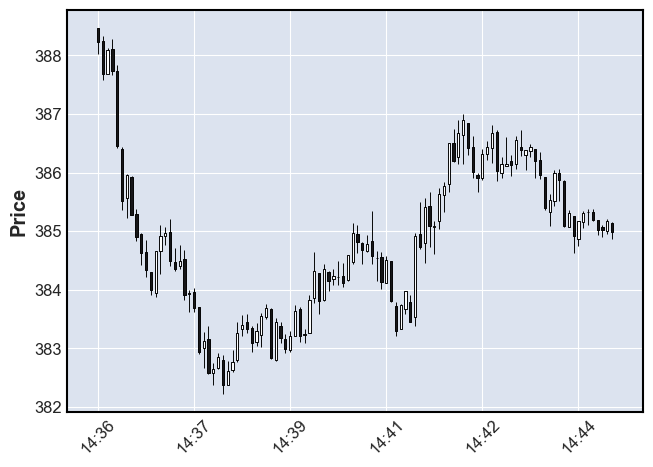

In [21]:
import mplfinance as mpf

new_df = stock_data
new_df.index = pd.DatetimeIndex(new_df['date'])

#graphs portion of the speech where stock was going down more than 20% [2022-11-02 14:36:20:2022-11-02 14:44:05]
mpf.plot(new_df['2022-11-02 14:36':'2022-11-02 14:44'],type='candle')

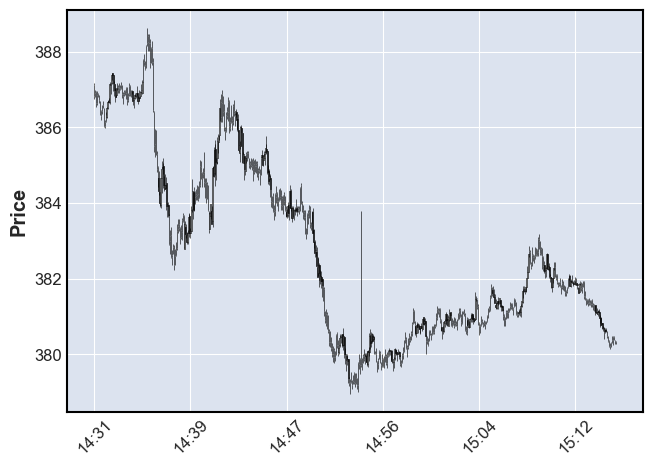

In [22]:
#price activity of SPY throughout the entire transcript
mpf.plot(new_df,type='candle')

In [42]:
#prints out timestamps and associated text spoken during that 5 seconds interval in the meeting
most_impact = stock_data
most_impact.index = pd.DatetimeIndex(most_impact['date'])
most_impact = most_impact['2022-11-02 14:36':'2022-11-02 14:44']

for i in most_impact["date"]:
    for k in most_impact["text"]:
        print(i,k)

2022-11-02 14:36:00 nan
2022-11-02 14:36:00  It will take time, however, for the full effects of monetary restraint to be realized, especially on inflation.
2022-11-02 14:36:00  That's why we say in our statement that in determining the pace of future increases in the target range, we will take into account the cumulative tightening of monetary policy and the lags with which monetary policy affects economic activity and inflation.
2022-11-02 14:36:00 nan
2022-11-02 14:36:00 nan
2022-11-02 14:36:00  At some point, as I've said in the last two press conferences, it will become appropriate to slow the pace of increases as we approach the level of interest rates that will be sufficiently restrictive to bring inflation down to our 2% goal.
2022-11-02 14:36:00 nan
2022-11-02 14:36:00 nan
2022-11-02 14:36:00  There is significant uncertainty around that level of interest rates.
2022-11-02 14:36:00  Even so, we still have some ways to go, and incoming data since our last meeting suggests that 

In [43]:
stock_data.to_excel("stock_fed_matched.xlsx")